<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Неявные-дубликаты" data-toc-modified-id="Неявные-дубликаты-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Неявные дубликаты</a></span></li><li><span><a href="#Удаление-данных" data-toc-modified-id="Удаление-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Удаление данных</a></span></li><li><span><a href="#Разделение-данных-на-обучающую-и-валидационную-выборки" data-toc-modified-id="Разделение-данных-на-обучающую-и-валидационную-выборки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделение данных на обучающую и валидационную выборки</a></span></li><li><span><a href="#Масштабирование-данных" data-toc-modified-id="Масштабирование-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Масштабирование данных</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Данные геологоразведки трёх регионов:**   
- id — уникальный идентификатор скважины;   
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);   
- product — объём запасов в скважине (тыс. баррелей).   

**Условия задачи:**   
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.   

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются

**Задачи:**   
- Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. 
- Проанализируйте возможную прибыль и риски техникой Bootstrap

## Загрузка и подготовка данных

### Загрузка данных

In [1]:
!pip install --upgrade pip

!pip install --upgrade Pillow

     |████████████████████████████████| 2.1 MB 2.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [2]:
pip install -U ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of visions to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of visions[type-image-path] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.3/686.3 kB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
pd.set_option('display.max_columns', None)

df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

# https://code.s3.yandex.net/datasets/geo_data_0.csv
# https://code.s3.yandex.net/datasets/geo_data_1.csv
# https://code.s3.yandex.net/datasets/geo_data_2.csv


In [24]:
#constants
COUNT = 500
BEST_COUNT = 200
SPENDINGS = 10**10
SPENDINGS_PER_ONE = SPENDINGS/ BEST_COUNT
REVENUE = 450000

### Изучение данных

In [6]:
params = {
    "title": "Профилирование данных",
    "dark_mode": True,
}

profile1 = ProfileReport(df1, **params)
profile2 = ProfileReport(df2, **params)
profile3 = ProfileReport(df3, **params)

display(profile1)
display(profile2)
display(profile3)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Можно изучить данные с помощью функции ниже

In [7]:
# def dataframe_info(df, head=True, describe=True, info=True, missing_values=True, duplicates=True):
#     if head:
#         print("Первые строки:")
#         display(df.head(5))
#         print("\n")
    
#     if describe:
#         print("Описательная статистика:")
#         display(df.describe())
#         print("\n")
    
#     if info:
#         print("Информация о DataFrame:")
#         df.info()
#         print("\n")
        
    
#     if missing_values:
#         missing_values_count = df.isna().sum()
#         if missing_values_count.sum() > 0:
#             print("Пропущенные значения:")
#             display(missing_values_count)
#             print("\n")
#         else:
#             print("Пропущенные значения не найдены.")
            
#     if duplicates:
#         duplicates_count = df.duplicated().sum()
#         if duplicates_count > 0:
#             print("Количество дубликатов:", duplicates_count)
#             print("Дубликаты:")
#             display(df[df.duplicated()])
#             print("\n")
#         else:
#             print("Явных дубликатов не найдено.")
#     plt.figure(figsize=(16, 4))
#     plt.subplot(1, 2, 1) 
#     plt.title('Ящик с усами')
#     plt.ylabel('Объём')
#     plt.boxplot (x = df['product'])
#     plt.subplot(1, 2, 2)
#     plt.title('Гистограмма распределения объёма')
#     plt.xlabel('Объём')
#     plt.ylabel('Количество')
#     plt.hist(x = df['product'], bins=35, range = (0, 200))
#     plt.show()

# dataframe_info(df1, head=True, describe=True, duplicates=True, missing_values=True, info=True)
# dataframe_info(df2, head=True, describe=True, duplicates=True, missing_values=True, info=True)
# dataframe_info(df3, head=True, describe=True, duplicates=True, missing_values=True, info=True)



В данных по второму региону всего 12 вариантов объемов запасов

In [8]:
df2['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

В нашем распоряжении 3 датафрейма:

- 100000 строк   
- 5 столбцов
- явных дубликатов нет
- пропусков нет

df2  содержит данные, в которых возможно есть проблема - объёмов запасов в скважине (тыс. баррелей) всего 12, есть выраженная корреляция между f2 и product (возможно причина в том же маленьком количестве разных значений запасов (всего 12)) , но данные синтетические - была бы возможность, уточнили у коллег, которые подготовили данные.

### Неявные дубликаты

In [7]:
def fuzzy_duplicates(data, row):
    duplicates_id = data[data[row].duplicated(keep=False)]
    display(duplicates_id)

fuzzy_duplicates(df1, 'id')
fuzzy_duplicates(df2, 'id')
fuzzy_duplicates(df3, 'id')


id        f0        f1         f2     product
931    HZww2  0.755284  0.368511   1.863211   30.681774
1364   bxg6G  0.411645  0.856830  -3.653440   73.604260
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
16633  fiKDv  0.157341  1.028359   5.585586   95.817889
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
41724  bxg6G -0.823752  0.546319   3.630479   93.007798
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
64022  74z30  0.741456  0.459229   5.153109  140.771492
66136  74z30  1.084962 -0.312358   6.990771  127.643327
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
89582  bsk9y  0.398908 -0.400253  10.122376  163.433078
90815  fiKDv  0.049883  0.841313   6.394613  137.346586
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
97785  bsk9y  0.378429  0.005837   0.160827  160.637302

id         f0         f1        f2     product
1305   LHZR0  11.170835  -1.945066  3.002872   80.859783
2721   bfPNe  -9.494442  -5.463692  4.006042  110.992147
5849   5ltQ6  -3.435401 -12.296043  1.999796   57.085625
41906  LHZR0  -8.989672  -4.286607  2.009139   57.085625
47591  wt4Uk  -9.091098  -8.109279 -0.002314    3.179103
82178  bfPNe  -6.202799  -4.820045  2.995107   84.038886
82873  wt4Uk  10.259972  -9.376355  4.994297  134.766305
84461  5ltQ6  18.213839   2.191999  3.993869  107.813044

id        f0        f1        f2     product
11449  VF7Jo  2.122656 -0.858275  5.746001  181.716817
28039  xCHr8  1.633027  0.368135 -2.378367    6.120525
43233  xCHr8 -0.847066  2.101796  5.597130  184.388641
44378  Vcm5J -1.229484 -2.439204  1.222909  137.968290
45404  KUPhW  0.231846 -1.698941  4.990775   11.716299
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572

Выявили дубликаты,но так как нам неизвестно какой из вариантов верный и их количество незначительное, оставим как есть. Если есть возможность, то лучше уточнить у коллег, подготовивших данные.

### Удаление данных

In [8]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)
display(df1.head())
display(df2.head())
display(df3.head())

f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647

f0         f1        f2     product
0 -15.001348  -8.276000 -0.005876    3.179103
1  14.272088  -3.475083  0.999183   26.953261
2   6.263187  -5.948386  5.001160  134.766305
3 -13.081196 -11.506057  4.999415  137.945408
4  12.702195  -8.147433  5.004363  134.766305

f0        f1        f2     product
0 -1.146987  0.963328 -0.828965   27.758673
1  0.262778  0.269839 -2.530187   56.069697
2  0.194587  0.289035 -5.586433   62.871910
3  2.236060 -0.553760  0.930038  114.572842
4 -0.515993  1.716266  5.899011  149.600746

Так как столбец id никак не повлияет на обучение, удалили его.

### Разделение данных на обучающую и валидационную выборки

In [9]:
def split(data, target_column):
    target = data[target_column]
    features = data.drop(target_column, axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    display(features_train.shape)
    display(target_train.shape)
    display(features_valid.shape)
    display(target_valid.shape)
    return target, features, features_train, features_valid, target_train, target_valid

target_1, features_1, features_train_1, features_valid_1, target_train_1, target_valid_1 = split(df1, 'product')
target_2, features_2, features_train_2, features_valid_2, target_train_2, target_valid_2 = split(df2, 'product')
target_3, features_3, features_train_3, features_valid_3, target_train_3, target_valid_3 = split(df3, 'product')


(75000, 3)

(75000,)

(25000, 3)

(25000,)

(75000, 3)

(75000,)

(25000, 3)

(25000,)

(75000, 3)

(75000,)

(25000, 3)

(25000,)

### Масштабирование данных

In [10]:
pd.options.mode.chained_assignment = None

def nptodf(data, ind, column):
    frame = pd.DataFrame(data, index = ind.index, columns = column.columns)
    return frame

def scale(features_train, features_valid, target_train, target_valid, features):
    scaler = StandardScaler()
    scaler.fit(features_train) 
    features_train_scaled = scaler.transform(features_train)
    features_valid_scaled = scaler.transform(features_valid)
    features_train_scaled = nptodf(features_train_scaled, target_train, features)
    features_valid_scaled = nptodf(features_valid_scaled, target_valid, features)
    display(features_train_scaled.shape)
    display(features_valid_scaled.shape)
    
scale(features_train_1, features_valid_1, target_train_1, target_valid_1, features_1)
scale(features_train_2, features_valid_2, target_train_2, target_valid_2, features_2)
scale(features_train_3, features_valid_3, target_train_3, target_valid_3, features_3)   

(75000, 3)

(25000, 3)

(75000, 3)

(25000, 3)

(75000, 3)

(25000, 3)

## Обучение и проверка модели

In [11]:
def linear_regression(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = pd.Series(model.predict(features_valid), index=target_valid.index)
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    average_product = sum(predictions) / len(predictions)
    print("RMSE: {0:.2f}".format(rmse))
    print("Average product: {0:.2f}".format(average_product))
    return (predictions, target_valid, rmse, average_product)

predictions_1, target_1, rmse_1, average_1 = linear_regression(features_train_1, features_valid_1, target_train_1, target_valid_1)
predictions_2, target_2, rmse_2, average_2 = linear_regression(features_train_2, features_valid_2, target_train_2, target_valid_2)
predictions_3, target_3, rmse_3, average_3 = linear_regression(features_train_3, features_valid_3, target_train_3, target_valid_3)

    

RMSE: 37.58
Average product: 92.59
RMSE: 0.89
Average product: 68.73
RMSE: 40.03
Average product: 94.97


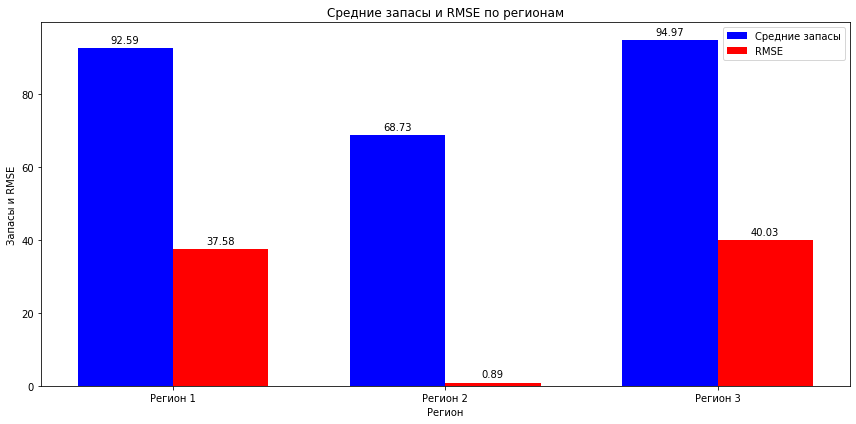

In [14]:
averages= [average_1, average_2, average_3]
rmses = [rmse_1, rmse_2, rmse_3]

indices = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(indices - bar_width/2, averages, bar_width, color='b', label='Средние запасы')
bars2 = ax.bar(indices + bar_width/2, rmses, bar_width, color='r', label='RMSE')

ax.set_ylabel('Запасы и RMSE')
ax.set_xlabel('Регион')
ax.set_title('Средние запасы и RMSE по регионам')
ax.set_xticks(indices)
ax.set_xticklabels(['Регион 1', 'Регион 2', 'Регион 3'])
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

Третий регион имеет лучший средний показатель по запасам нефти, по результату самый интересный регион - второй, так как RMSE самый низкий.

## Подготовка к расчёту прибыли

In [12]:
product_volume = SPENDINGS/BEST_COUNT/REVENUE
print('Достаточный объём сырья для безубыточной разработки новой скважины:', product_volume)

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111


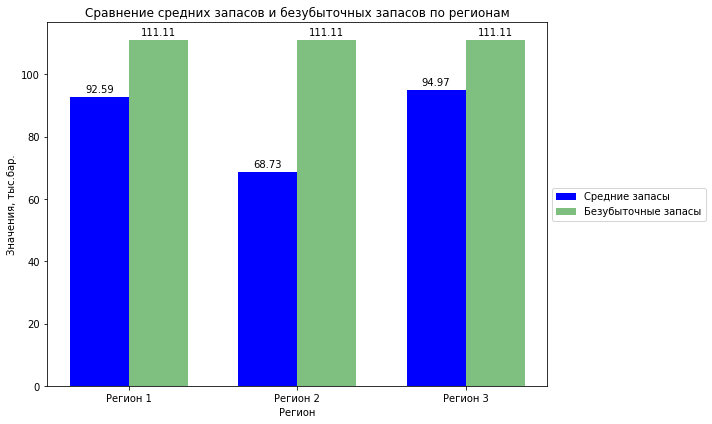

In [16]:

averages = [average_1, average_2, average_3]

indices = np.arange(3)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(indices, averages, bar_width, color='b', label='Средние запасы')
bars2 = ax.bar(indices + bar_width, product_volume, bar_width, color='g', alpha=0.5, label='Безубыточные запасы')
ax.set_ylabel('Значения, тыс.бар.')
ax.set_xlabel('Регион')
ax.set_title('Сравнение средних запасов и безубыточных запасов по регионам')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(['Регион 1', 'Регион 2', 'Регион 3'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bars1)
autolabel(bars2)
plt.tight_layout()
plt.show()


Средний объём запасов в регионах меньше, чем достаточный объём для безубыточности

## Расчёт прибыли и рисков 

In [13]:
def calculate_profit(target, predictions, count, region):
    predictions_series = pd.Series(predictions)
    predictions_sorted = predictions_series.sort_values(ascending=False)
    predictions_best = target[predictions_sorted.index][:count]
    total_profit = REVENUE * predictions_best.sum() - SPENDINGS
    print(region)
    print('Запасы по выбранным скважинам', '{:,.2f}'.format(predictions_best.sum()), 'тыс.бар.')
    print('Прибыль для выбранных скважин', '{:,.2f}'.format(total_profit))
    print('\n')
    return total_profit

total_profit_1 = calculate_profit(target_1, predictions_1, BEST_COUNT, 'Регион 1: ')
total_profit_2 = calculate_profit(target_2, predictions_2, BEST_COUNT, 'Регион 2: ')
total_profit_3 = calculate_profit(target_3, predictions_3, BEST_COUNT, 'Регион 3: ')

Регион 1: 
Запасы по выбранным скважинам 29,601.84 тыс.бар.
Прибыль для выбранных скважин 3,320,826,043.14


Регион 2: 
Запасы по выбранным скважинам 27,589.08 тыс.бар.
Прибыль для выбранных скважин 2,415,086,696.68


Регион 3: 
Запасы по выбранным скважинам 28,245.22 тыс.бар.
Прибыль для выбранных скважин 2,710,349,963.60




Подготовим функцию для расчета прибыли по выбранным скважинам.

In [14]:
def revenue(target, predictions, count):
    predictions_series = pd.Series(predictions)
    predictions_sorted = predictions.sort_values(ascending=False)
    predictions_best = target[predictions_sorted.index][:count]
    total_profit = REVENUE * predictions_best.sum() - SPENDINGS
    return total_profit

Посчитаем прибыль и риски с помощью техники Bootstrap

In [18]:
def calculate_profit_bootstrap(target, predictions, count, region):
    profits = []
    for i in range(1000):
        target_subsample = target.sample(n=count, replace=True, random_state=i)
        predictions_subsample = predictions[target_subsample.index]
        income = revenue(target_subsample, predictions_subsample, BEST_COUNT)
        profits.append(income)
    profits = pd.Series(profits)    
      
    mean = profits.mean()
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = (profits < 0).mean()
    
    print(region)
    print("Средняя прибыль:", '{:,.2f}'.format(mean))
    lower_str = "{:,.2f}".format(confidence_interval[0])
    upper_str = "{:,.2f}".format(confidence_interval[1])
    print("Доверительный интервал (95%):", '[' + lower_str + ', ' + upper_str + ']')
    print("Риск получения убытков:", '{:.2f}%'.format(risk_of_loss * 100))
    print('\n')
    return profits

profit_1 = calculate_profit_bootstrap(target_1, predictions_1, COUNT, 'Регион 1')
profit_2 = calculate_profit_bootstrap(target_2, predictions_2, COUNT, 'Регион 2')
profit_3 = calculate_profit_bootstrap(target_3, predictions_3, COUNT, 'Регион 3')

Регион 1
Средняя прибыль: 420,300,541.15
Доверительный интервал (95%): [-92,199,215.62, 937,472,670.46]
Риск получения убытков: 5.70%


Регион 2
Средняя прибыль: 517,103,136.60
Доверительный интервал (95%): [97,922,102.45, 983,531,101.81]
Риск получения убытков: 0.90%


Регион 3
Средняя прибыль: 413,216,203.65
Доверительный интервал (95%): [-106,970,928.19, 942,354,299.51]
Риск получения убытков: 5.60%




In [27]:
# пересчет прибыли со сброшенными индексами

def calculate_profit_bootstrap(target, predictions, count, region):
    profits = []
    for i in range(1000):
        target_subsample = target.sample(n=count, replace=True, random_state=i)
        predictions_subsample = predictions[target_subsample.index]
        income = revenue(target_subsample.reset_index(drop=True), predictions_subsample.reset_index(drop=True), BEST_COUNT)
        profits.append(income)
    profits = pd.Series(profits)    
      
    mean = profits.mean()
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = (profits < 0).mean()
    
    print(region)
    print("Средняя прибыль:", '{:,.2f}'.format(mean))
    lower_str = "{:,.2f}".format(confidence_interval[0])
    upper_str = "{:,.2f}".format(confidence_interval[1])
    print("Доверительный интервал (95%):", '[' + lower_str + ', ' + upper_str + ']')
    print("Риск получения убытков:", '{:.2f}%'.format(risk_of_loss * 100))
    print('\n')
    return profits

profit_1 = calculate_profit_bootstrap(target_1, predictions_1, COUNT, 'Регион 1')
profit_2 = calculate_profit_bootstrap(target_2, predictions_2, COUNT, 'Регион 2')
profit_3 = calculate_profit_bootstrap(target_3, predictions_3, COUNT, 'Регион 3')

Регион 1
Средняя прибыль: 388,345,042.77
Доверительный интервал (95%): [-99,868,029.94, 877,365,288.83]
Риск получения убытков: 6.60%


Регион 2
Средняя прибыль: 457,321,570.76
Доверительный интервал (95%): [50,258,370.30, 872,327,130.12]
Риск получения убытков: 1.70%


Регион 3
Средняя прибыль: 387,551,495.33
Доверительный интервал (95%): [-95,510,056.50, 881,318,675.76]
Риск получения убытков: 6.50%




## Выводы

**Данные геологоразведки трёх регионов:**   
- id — уникальный идентификатор скважины;   
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);   
- product — объём запасов в скважине (тыс. баррелей).   

**Условия задачи:**   
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.   

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются

**Задачи:**   
- Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. 
- Проанализируйте возможную прибыль и риски техникой Bootstrap

На этапе загрузки и изучения данных установили:

В нашем распоряжении 3 датафрейма:

100000 строк
5 столбцов
явных дубликатов нет
пропусков нет
df2 содержит данные, в которых возможно есть проблема - объёмов запасов в скважине (тыс. баррелей) всего 12, есть выраженная корреляция между f2 и product (возможно причина в том же маленьком количестве разных значений запасов (всего 12)) , но данные синтетические - была бы возможность, уточнили у коллег, которые подготовили данные.

На этапе обработки данных:
- Выявили дубликаты,но так как нам неизвестно какой из вариантов верный и их количество незначительное, оставим как есть. Если есть возможность, то лучше уточнить у коллег, подготовивших данные.
- Удалили столбец id, так как он не нужен для обучения модели
- Разделили данные на обучающие и валидоционные выборки в соотношении 3:1.
- Масштабировали данные.


Обучили и проверили модель на валидационной выборке:
Установили, что третий регион имеет лучший средний показатель по запасам нефти, по результату самый интересный регион - второй, так как RMSE самый низкий.

Установили, что достаточный объём сырья для безубыточной разработки новой скважины: 111.11(1). Средний объём запасов во всех регионах меньше, чем достаточный объём для безубыточности.

Вычислили запасы и прибыли по регионам из 200 самых богатых месторождений в каждом регионе
Регион 1: 
Запасы по выбранным скважинам 29,601.84 тыс.бар.
Прибыль для выбранных скважин 3,320,826,043.14


Регион 2: 
Запасы по выбранным скважинам 27,589.08 тыс.бар.
Прибыль для выбранных скважин 2,415,086,696.68


Регион 3: 
Запасы по выбранным скважинам 28,245.22 тыс.бар.
Прибыль для выбранных скважин 2,710,349,963.60

Рассчитали прибыль, доверительный интвервал и риски с помощью техники bootstrap

Регион 1
Средняя прибыль: 420,300,541.15
Доверительный интервал (95%): [-92,199,215.62, 937,472,670.46]
Риск получения убытков: 5.70%


Регион 2
Средняя прибыль: 517,103,136.60
Доверительный интервал (95%): [97,922,102.45, 983,531,101.81]
Риск получения убытков: 0.90%


Регион 3
Средняя прибыль: 413,216,203.65
Доверительный интервал (95%): [-106,970,928.19, 942,354,299.51]
Риск получения убытков: 5.60%


На основании полученных результатов можно сделать вывод, что второй регион наиболее привлекателен для разработки меторождений. 
Самая большая средняя прибыль лучших меторождений и самый маленький риск получить убыток.

**Задачи:**   
- Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. **выполнено**
- Проанализируйте возможную прибыль и риски техникой Bootstrap - **выполнено** - рекомендуем регион 2 для разработки.







